In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from wordcloud import WordCloud
import seaborn as sns
pio.templates.default = "plotly_white"

### Q.1: Show column names and have a look at their info

In [3]:
data = pd.read_csv("E:\dataScience\AICP internship tasks\EDA Internship\EDA Intership Week 5\Instagram data.csv", encoding='latin1')

In [4]:
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [123]:
data.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

### Q.2: Show the descriptive statistics of the data.

In [124]:
data.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


###  Q.3: Check if your data contains any missing values

In [125]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

Q.4: When you start exploring your data, always start by exploring the main feature of your data. For
example, as we are working on a dataset based on Instagram Reach, we should start by exploring the
feature that contains data about reach. In our data, the Impressions column contains the data about the
reach of an Instagram post. So let’s have a look at the distribution of the Impressions:

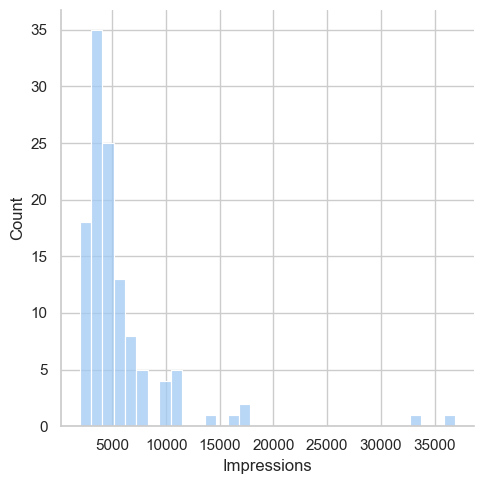

In [126]:
sns.displot(data['Impressions'])

## ques 5:Have a look at the number of impressions on each post over time as shown bel

## ques 5 and 6

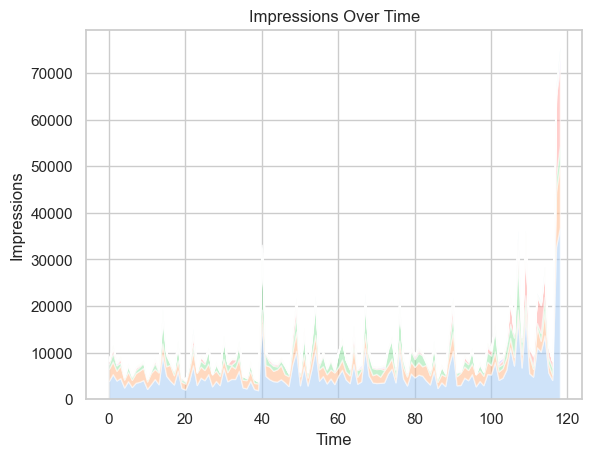

In [128]:
data_numeric = data.drop(columns=['Caption', 'Hashtags'])
num_posts = len(data_numeric.columns)
data_array = data_numeric.values.T
plt.stackplot(data.index, data_array, labels=[f'Post {i+1}' for i in range(num_posts)], alpha=0.5)
plt.title('Impressions Over Time')
plt.xlabel('Time')
plt.ylabel('Impressions')
plt.show()

###  Q.7: Have a look at the distribution of reach from different sources 

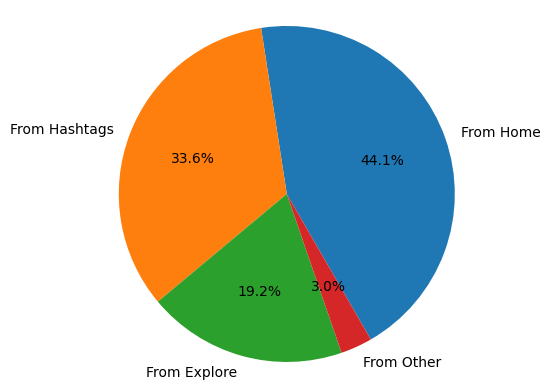

In [5]:
total_impressions = data[['From Home', 'From Hashtags', 'From Explore', 'From Other']].sum()
plt.pie(total_impressions, labels=total_impressions.index, autopct='%1.1f%%', startangle=300)
plt.axis('equal')
plt.show()

## ques 8:

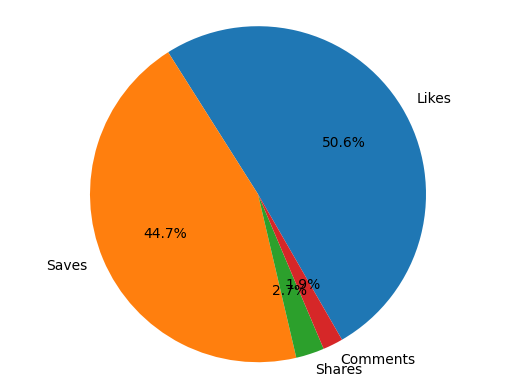

In [7]:
total_impressions = data[['Likes', 'Saves', 'Shares', 'Comments']].sum()
plt.pie(total_impressions, labels=total_impressions.index,
        autopct='%1.1f%%', startangle=300)
plt.axis('equal')
plt.show()

### ques 09: Have a look at the relationship between the number of profile visits and follows

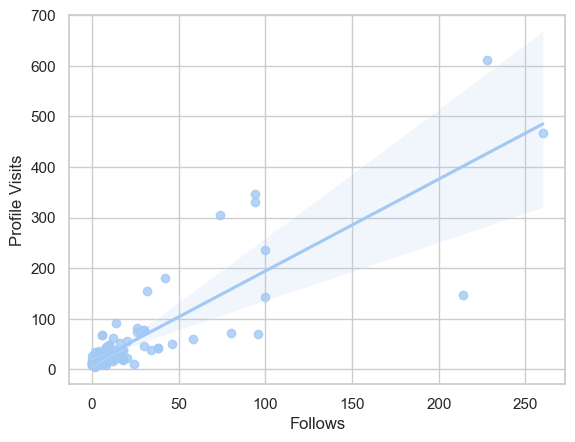

In [134]:
sns.regplot(x='Follows',y='Profile Visits',data=data)
plt.show()

## Ques 11

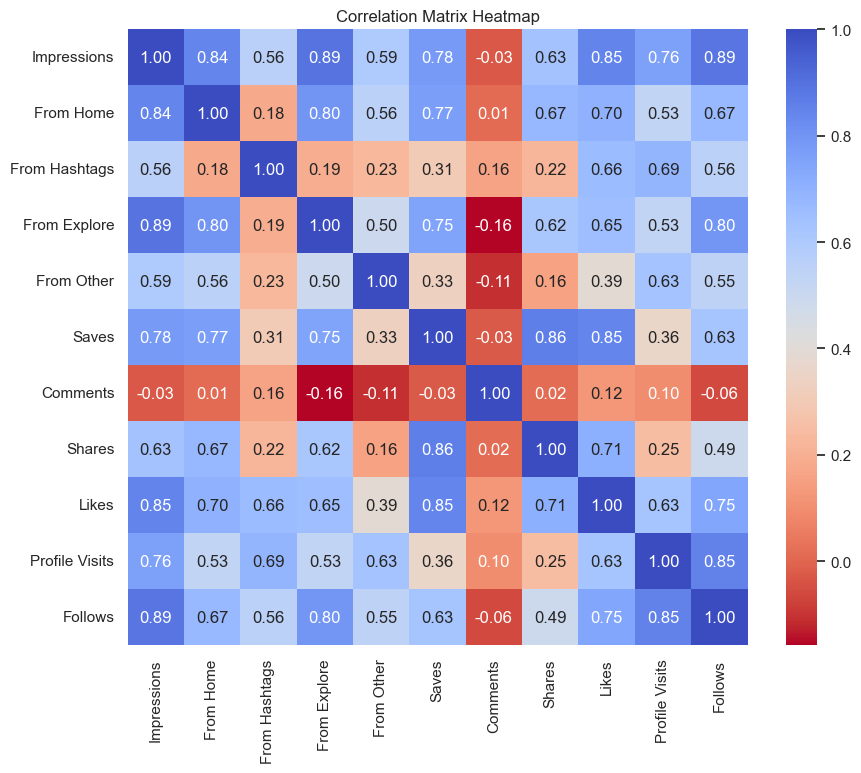

In [136]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm_r', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## Ques 12:

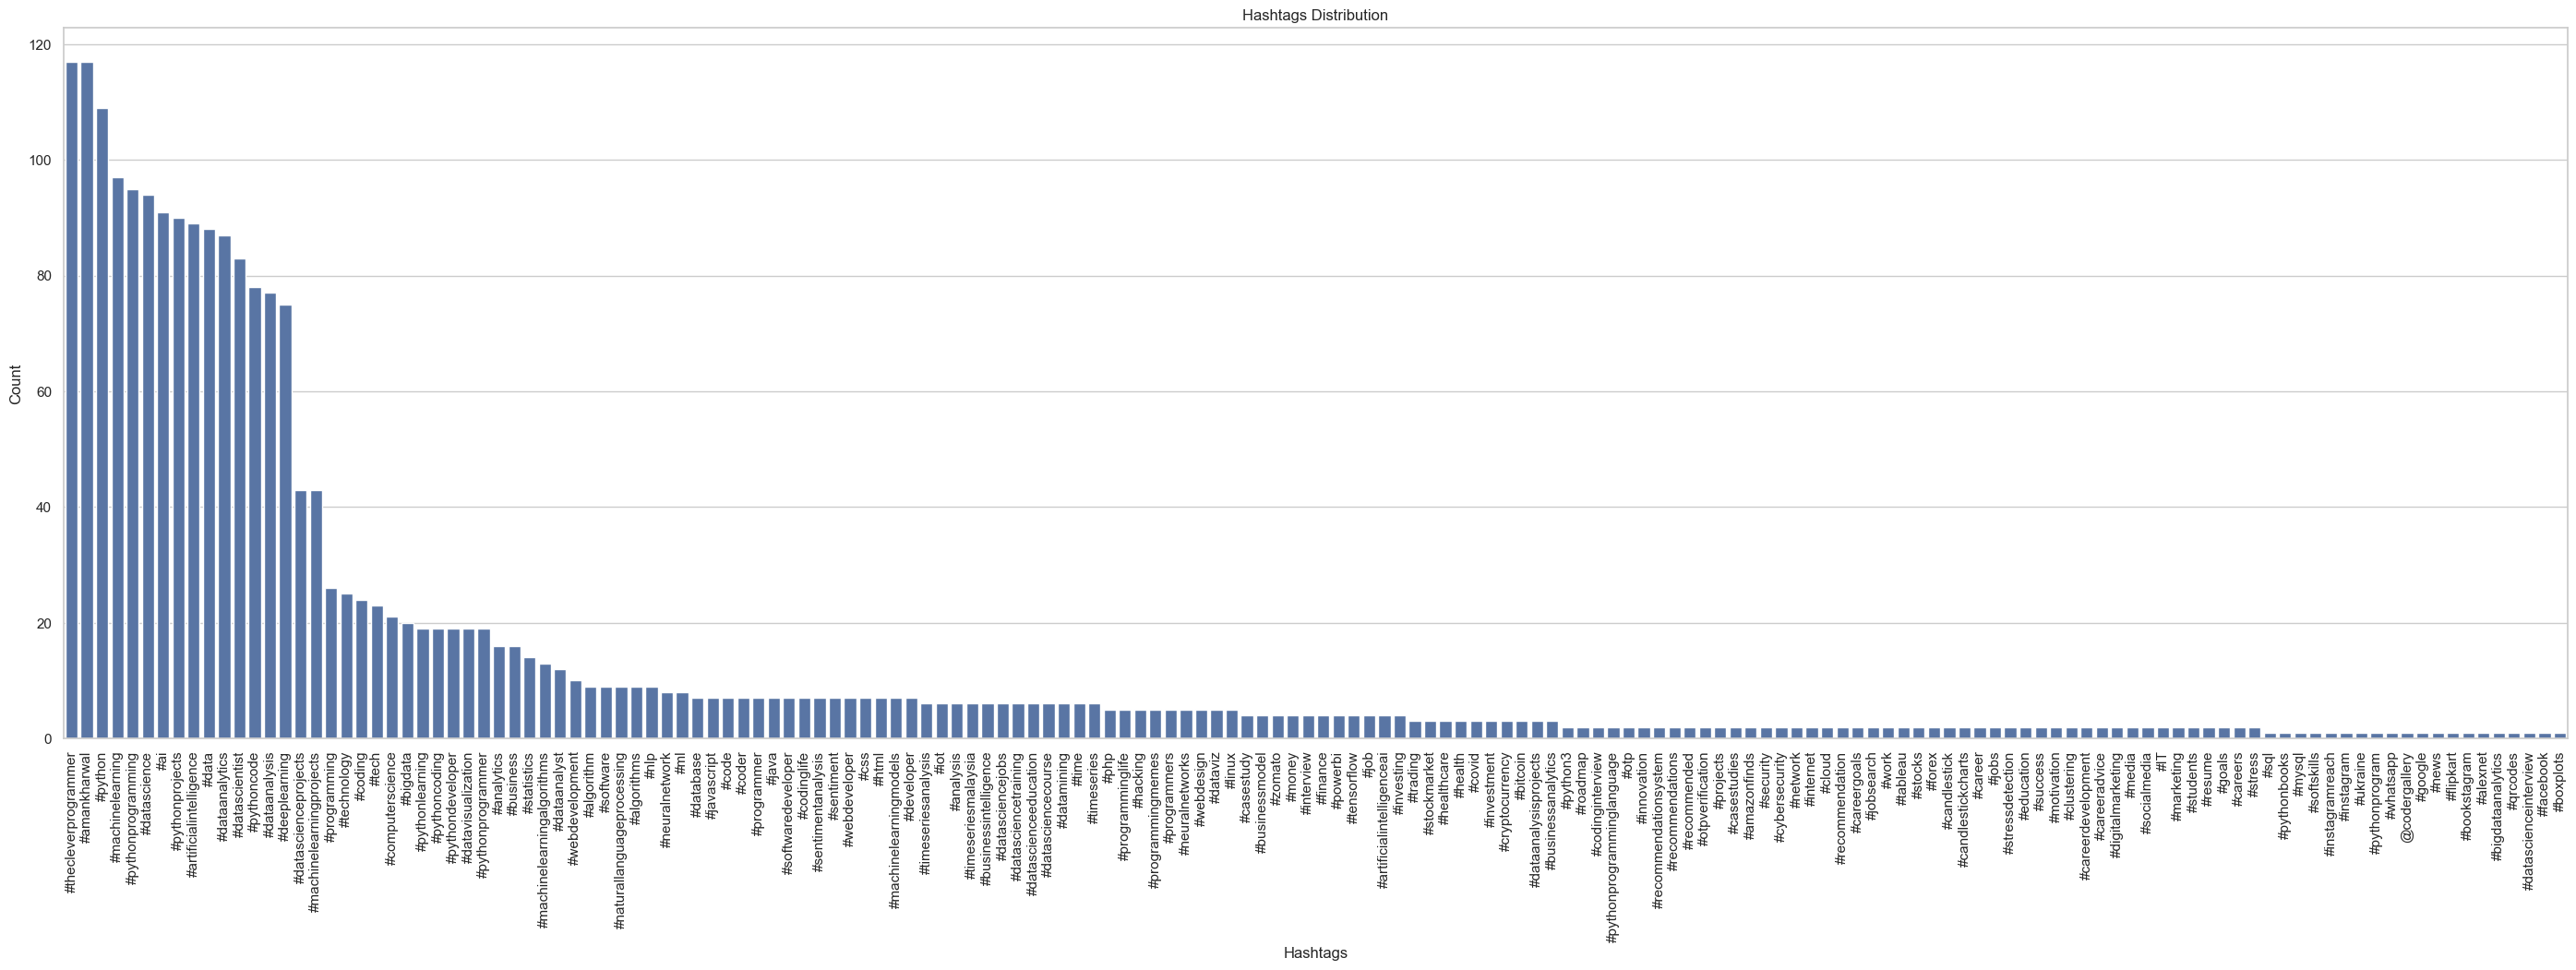

In [156]:
hashtags_df = df['Hashtags'].str.split(expand=True).stack()
hashtag_distribution = hashtags_df.value_counts()

hashtag_distribution_df = pd.DataFrame(
    {'hashtag': hashtag_distribution.index, 'count': hashtag_distribution.values})

plt.figure(figsize=(35,10))
sns.barplot(x='hashtag', y='count', data=hashtag_distribution_df, color='b')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.title('Hashtags Distribution')
plt.xticks(rotation=90)
plt.show()